In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "/Users/aoki0903/Desktop/研究室プログラミング/search_capability/table4.jsonl"
df = pd.read_json(file_path, lines=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [310]:
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[104/(107+104),105/(148+105),92/(167+92), 73/(47+73),187/(107+187),154/(154+136)]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[101/(101+143),63/(63+197),22/(22+253),69/(69+218),11/(11+286),0]})
palm_data = pd.DataFrame({"model":["PaLM2"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[105/(105+19),146/(146+86),107/(107+120),48/(48+28),73/(73+165),17/(17+269)]})
llama_data = pd.DataFrame({"model":["Llama2"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[174/(174+28),189/(189+23),168/(168+25),66/(66+53),68/(68+99),48/(48+115)]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

In [330]:
# 2×2のサブプロット配置に変更し、指定された変更を加える
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharex=True, sharey=True,)

models = ["PaLM2", "Llama2", "GPT-3.5", "GPT-4"]
# グラフの配置を2×2にするための設定
for i, model in enumerate(models):
    updated_model = model
    
    row, col = divmod(i, 2)
    ax = axes[row, col]
    sns.lineplot(data=data[data['model'] == model], x='step', y='huristic_value_valid', hue='heuristic_type', 
                 style='heuristic_type', markers=True, dashes=True, markersize=18, alpha=0.6, linewidth=5.0, ax=ax)
    ax.axhline(0.5, color='lightgray', lw=2,label='Chance rate')
    ax.set_title(f'{updated_model}', fontsize=26)
    ax.set_ylim(0, 1)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["4→3","3→2","2→1"], fontsize=26)  # フォントサイズを大きく
    ax.tick_params(axis='y', labelsize=22)
    ax.grid(False)
    
    # 個々のプロットのx軸のラベルを削除
    ax.set_xlabel("")

    # 凡例は右上のプロットのみに設定
    if (row, col) == (1, 1):
        ax.legend(title_fontsize='24', fontsize='22', loc='upper right')
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# 全てのプロットのy軸ラベルを削除
for ax in axes.flatten():
    ax.set_ylabel("")

# x軸の全体ラベルを削除
fig.supxlabel('Distance between the reasoning step and goal', fontsize=26, y=0.07)
fig.supylabel('Probability of distractors selected', fontsize=26,x=0.06)

# y軸の全体ラベルを削除
fig.text(0.02, 0.5, '', va='center', rotation='vertical', fontsize=22)

# タイトルと軸ラベルが重ならないように調整
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/figure3_v0.pdf'
plt.savefig(pdf_path_subplot_2x2_final, format='pdf',bbox_inches="tight")
plt.close()

In [155]:

#Distract = 1
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[26/(47+26),21/(21+48),16/(16+54),22/(22+16),57/(57+27),39/(39+47)]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[6/(6+58),8/(8+82),2/(2+98),8/(8+82),5/(5+94),0]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

In [186]:
#Distract = 3
step = [1,2,3,4]*2

#gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[18/(18+41),19/(19+25),18/(18+25),16/(26+16),47/(47+23),32/(40+32)]})
#gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[15/(40+15),21/(25+21),16/(16+29),0,0,0]})
gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*8, "heuristic_type":["Overlap"]*4+["Position"]*4, "step":step,"huristic_value_valid":[15/(40+15),20/(20+22),19/(19+28),0,11/(11+31),48/(48+25),23/(23+47),6/(91+6)]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*8, "heuristic_type":["Overlap"]*4+["Position"]*4, "step":step,"huristic_value_valid":[0,0,0,0,0,0,0,0]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

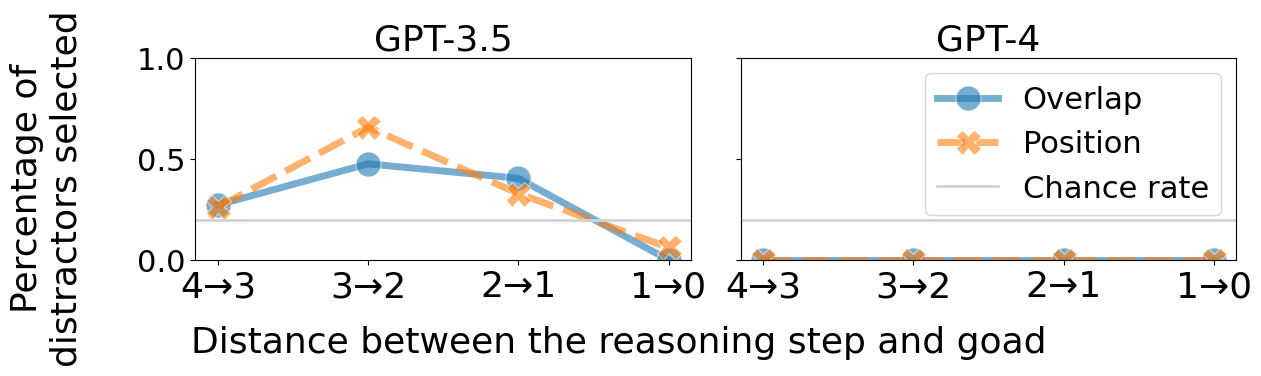

In [187]:
# 2×2のサブプロット配置に変更し、指定された変更を加える
fig, axes = plt.subplots(1, 2, figsize=(13, 4), sharex=True, sharey=True,)

models = ["GPT-3.5", "GPT-4"]
# グラフの配置を2×2にするための設定
for i, model in enumerate(models):
    updated_model = model
    
    
    ax = axes[i]
    sns.lineplot(data=data[data['model'] == model], x='step', y='huristic_value_valid', hue='heuristic_type', 
                 style='heuristic_type', markers=True, dashes=True, markersize=18, alpha=0.6, linewidth=5.0, ax=ax)
    ax.axhline(0.2, color='lightgray', lw=2,label='Chance rate')
    ax.set_title(f'{updated_model}', fontsize=26)
    ax.set_ylim(0, 1)
    ax.set_xticks([1, 2, 3,4])
    ax.set_xticklabels(["4→3","3→2","2→1","1→0"], fontsize=26)  # フォントサイズを大きく
    ax.tick_params(axis='y', labelsize=22)
    ax.grid(False)
    
    # 個々のプロットのx軸のラベルを削除
    ax.set_xlabel("")

    # 凡例は右上のプロットのみに設定
    if i==1:
        ax.legend(title_fontsize='24', fontsize='22', loc='upper right')
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# 全てのプロットのy軸ラベルを削除
for ax in axes.flatten():
    ax.set_ylabel("")

# x軸の全体ラベルを削除
fig.supxlabel('Distance between the reasoning step and goad', fontsize=26, y=0.07)
fig.supylabel('Percentage of\ndistractors selected', fontsize=26,x=0.06, horizontalalignment='center')

# y軸の全体ラベルを削除
fig.text(0.02, 0.5, '', va='center', rotation='vertical', fontsize=22)

# タイトルと軸ラベルが重ならないように調整
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/研究室プログラミング/search_capability/plot.pdf'
#plt.savefig(pdf_path_subplot_2x2_final, format='pdf')
#plt.close()

In [283]:
#DISTRACT = 3, FLAT
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[30/(30+13),21/(21+20),18/(18+19),15/(15+6),57/(57+12),36/(36+6)]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[(13+30)/(13+30+49),(20+21)/(20+21+52),(18+19)/(18+19+62),(15+6)/(15+6+17),(57+12)/(57+12+34),(36+6)/(36+6+54)]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

In [288]:
#DISTRACT = 3, FLAT_DISTRACT
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[0,0,0,25/(25+12),49/(49+15),37/(37+7)]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[0,0,0,(25+12)/(25+12+34),(49+15)/(49+15+37),(37+7)/(37+7+58)]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

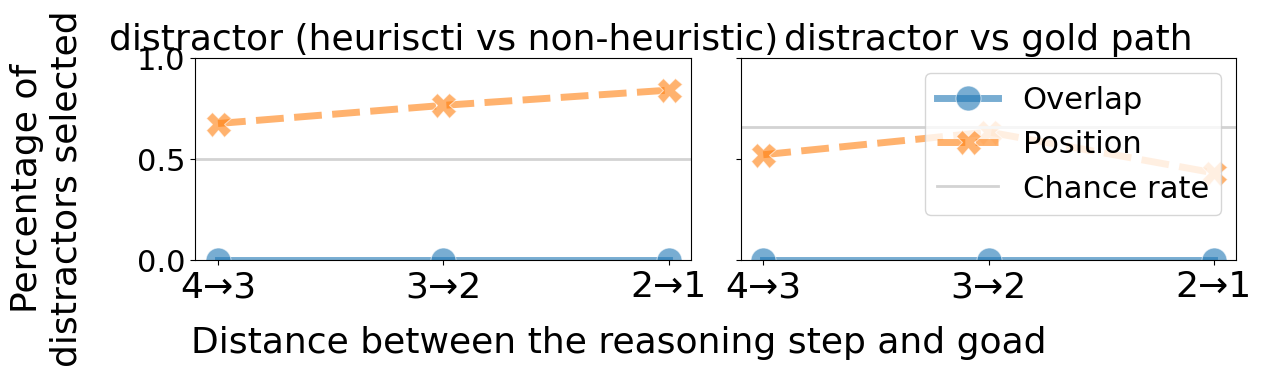

In [289]:
# 2×2のサブプロット配置に変更し、指定された変更を加える
fig, axes = plt.subplots(1, 2, figsize=(13, 4), sharex=True, sharey=True,)

models = ["GPT-3.5", "GPT-4"]
titles = ["distractor (heuriscti vs non-heuristic)", "distractor vs gold path"]
# グラフの配置を2×2にするための設定
for i, model in enumerate(models):
    updated_model = titles[i]
    
    
    ax = axes[i]
    sns.lineplot(data=data[data['model'] == model], x='step', y='huristic_value_valid', hue='heuristic_type', 
                 style='heuristic_type', markers=True, dashes=True, markersize=18, alpha=0.6, linewidth=5.0, ax=ax)
    if i==0:
        ax.axhline(0.5, color='lightgray', lw=2,label='Chance rate')
    else:
        ax.axhline(0.66, color='lightgray', lw=2,label='Chance rate')
    ax.set_title(f'{updated_model}', fontsize=26)
    ax.set_ylim(0, 1)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["4→3","3→2","2→1"], fontsize=26)  # フォントサイズを大きく
    ax.tick_params(axis='y', labelsize=22)
    ax.grid(False)
    
    # 個々のプロットのx軸のラベルを削除
    ax.set_xlabel("")

    # 凡例は右上のプロットのみに設定
    if i==1:
        ax.legend(title_fontsize='24', fontsize='22', loc='upper right')
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# 全てのプロットのy軸ラベルを削除
for ax in axes.flatten():
    ax.set_ylabel("")

# x軸の全体ラベルを削除
fig.supxlabel('Distance between the reasoning step and goad', fontsize=26, y=0.07)
fig.supylabel('Percentage of\ndistractors selected', fontsize=26,x=0.06, horizontalalignment='center')

# y軸の全体ラベルを削除
fig.text(0.02, 0.5, '', va='center', rotation='vertical', fontsize=22)

# タイトルと軸ラベルが重ならないように調整
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/研究室プログラミング/search_capability/plot.pdf'
#plt.savefig(pdf_path_subplot_2x2_final, format='pdf')
#plt.close()

In [285]:
#DISTRACT = 5, DISTRACT
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[13/(13+19),18/(47+18),15/(42+15),4/(4+1),1,1]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[(13+19)/(13+19+39),(47+18)/(23+47+18),(42+15)/(42+15+40),(4+1)/(4+1+17),45/(45+26),29/(29+50)]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

In [290]:
#DISTRACT = 5, FLAT_DISTRACT
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[18/(18+28),20/(20+40),21/(21+37),1,50/(50+1),1]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[(18+28)/(18+28+39),(20+40)/(20+40+24),(21+37)/(21+37+37),29/(29+50),(50+1)/(50+1+27),31/(31+50)]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

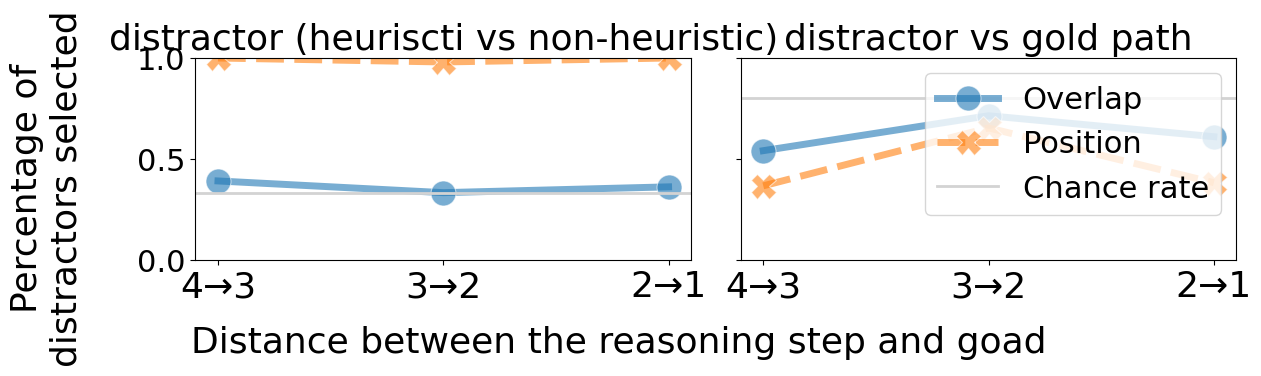

In [291]:
# 2×2のサブプロット配置に変更し、指定された変更を加える
fig, axes = plt.subplots(1, 2, figsize=(13, 4), sharex=True, sharey=True,)

models = ["GPT-3.5", "GPT-4"]
titles = ["distractor (heuriscti vs non-heuristic)", "distractor vs gold path"]

# グラフの配置を2×2にするための設定
for i, model in enumerate(models):
    updated_model = titles[i]
    
    
    ax = axes[i]
    sns.lineplot(data=data[data['model'] == model], x='step', y='huristic_value_valid', hue='heuristic_type', 
                 style='heuristic_type', markers=True, dashes=True, markersize=18, alpha=0.6, linewidth=5.0, ax=ax)
    if i==0:
        ax.axhline(0.33, color='lightgray', lw=2,label='Chance rate')
    else:
        ax.axhline(0.8, color='lightgray', lw=2,label='Chance rate')
    ax.set_title(f'{updated_model}', fontsize=26)
    ax.set_ylim(0, 1)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["4→3","3→2","2→1"], fontsize=26)  # フォントサイズを大きく
    ax.tick_params(axis='y', labelsize=22)
    ax.grid(False)
    
    # 個々のプロットのx軸のラベルを削除
    ax.set_xlabel("")

    # 凡例は右上のプロットのみに設定
    if i==1:
        ax.legend(title_fontsize='24', fontsize='22', loc='upper right')
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# 全てのプロットのy軸ラベルを削除
for ax in axes.flatten():
    ax.set_ylabel("")

# x軸の全体ラベルを削除
fig.supxlabel('Distance between the reasoning step and goad', fontsize=26, y=0.07)
fig.supylabel('Percentage of\ndistractors selected', fontsize=26,x=0.06, horizontalalignment='center')

# y軸の全体ラベルを削除
fig.text(0.02, 0.5, '', va='center', rotation='vertical', fontsize=22)

# タイトルと軸ラベルが重ならないように調整
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/研究室プログラミング/search_capability/plot.pdf'
#plt.savefig(pdf_path_subplot_2x2_final, format='pdf')
#plt.close()

In [ ]:
#DISTRACT = 5, FLAT_DISTRACT
step = [1,2,3]*2

gpt3_data = pd.DataFrame({"model":["GPT-3.5"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[0,0,0,0,0,0]})
gpt4_data = pd.DataFrame({"model":["GPT-4"]*6, "heuristic_type":["Overlap"]*3+["Position"]*3, "step":step,"huristic_value_valid":[0,0,0,0,0,0]})
data = pd.concat([gpt3_data, gpt4_data, palm_data, llama_data])

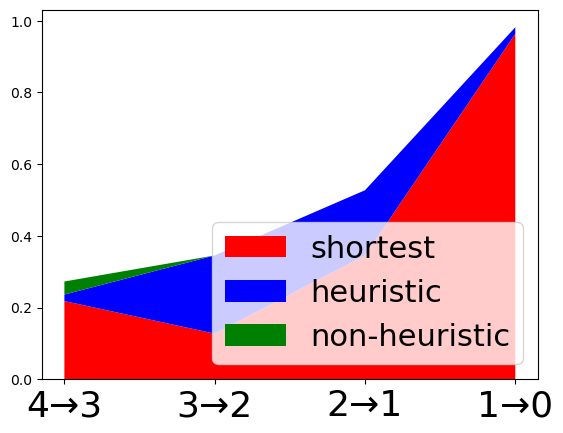

In [308]:
x = [1, 2, 3, 4]
y1 = [12, 7, 19, 53]
y2 = [1, 12, 10, 1]
y3 = [2, 0, 0, 0]

#y_sum = np.add(y1, y2)
#y_sum = np.add(y_sum, y3)
y_sum = [55,55,55,55]

y1 = np.divide(y1, y_sum)
y2 = np.divide(y2, y_sum)
y3 = np.divide(y3, y_sum)

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, colors=["r", "b", "g"],labels=["shortest", "heuristic", "non-heuristic"])
ax.legend(title_fontsize='24', fontsize='22', loc='lower right')
ax.set_xticks([1, 2, 3,4])
ax.set_xticklabels(["4→3","3→2","2→1","1→0"], fontsize=26)  # フォントサイズを大きく
plt.show()

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/appendix_result.pdf'
plt.savefig(pdf_path_subplot_2x2_final, format='pdf',bbox_inches="tight")
plt.close()

In [25]:
# 2×2のサブプロット配置に変更し、指定された変更を加える
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharex=True, sharey=True,)

models = ["GPT-3.5", "GPT-4"]
# グラフの配置を2×2にするための設定
for i, model in enumerate(models):
    updated_model = model
    if model == "GPT-3.5":
        x = [1, 2, 3]
        y1 = [15, 27, 30] #shortest
        y2 = [10, 11, 25] #heuristic
        y3 = [22, 48, 31] #non-heuristic
    elif model == "GPT-4":
        x = [1, 2, 3]
        y1 = [40, 82, 98] #shortest
        y2 = [3, 0, 0] #heuristic
        y3 = [0, 0, 0] #non-heuristic
    row, col = divmod(i, 2)
    ax = axes[i]
    ax.stackplot(x, y1, y2, y3, colors=["r", "b", "g"],labels=["shortest", "heuristic\n(overlap)", "non-heuristic"])
    #ax.axhline(0.5, color='lightgray', lw=2,label='Chance rate')
    ax.set_title(f'{updated_model}', fontsize=26)
    ax.set_ylim(0, 100)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["4→3","3→2","2→1"], fontsize=26)  # フォントサイズを大きく
    ax.tick_params(axis='y', labelsize=22)
    ax.grid(False)
    
    # 個々のプロットのx軸のラベルを削除
    ax.set_xlabel("")

    # 凡例は右上のプロットのみに設定
    if i == 1:
        ax.legend(title_fontsize='24', fontsize='22', bbox_to_anchor=(1.05, 0.7), loc='upper left', borderaxespad=0)
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# 全てのプロットのy軸ラベルを削除
for ax in axes.flatten():
    ax.set_ylabel("")

# x軸の全体ラベルを削除
fig.supxlabel('Distance between the reasoning step and goal', fontsize=26, y=0.07)
fig.supylabel('Number of cases\nwhere each premise\nwas selected', fontsize=26,x=0.11, horizontalalignment='center')

# y軸の全体ラベルを削除
fig.text(0.02, 0.5, '', va='center', rotation='vertical', fontsize=22)

# タイトルと軸ラベルが重ならないように調整
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
#plt.show()

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/overlap.pdf'
plt.savefig(pdf_path_subplot_2x2_final, format='pdf',bbox_inches="tight")
plt.close()

In [24]:
# 2×2のサブプロット配置に変更し、指定された変更を加える
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharex=True, sharey=True,)

models = ["GPT-3.5", "GPT-4"]
# グラフの配置を2×2にするための設定
for i, model in enumerate(models):
    updated_model = model
    if model == "GPT-3.5":
        x = [1, 2, 3]
        y1 = [19, 18, 39] #shortest
        y2 = [9, 24, 18] #heuristic
        y3 = [10, 18, 10] #non-heuristic
    elif model == "GPT-4":
        x = [1, 2, 3]
        y1 = [91, 90, 99] #shortest
        y2 = [0, 0, 0] #heuristic
        y3 = [0, 0, 0] #non-heuristic
    row, col = divmod(i, 2)
    ax = axes[i]
    ax.stackplot(x, y1, y2, y3, colors=["r", "b", "g"],labels=["shortest", "heuristic\n(position)", "non-heuristic"])
    #ax.axhline(0.5, color='lightgray', lw=2,label='Chance rate')
    ax.set_title(f'{updated_model}', fontsize=26)
    ax.set_ylim(0, 100)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(["4→3","3→2","2→1"], fontsize=26)  # フォントサイズを大きく
    ax.tick_params(axis='y', labelsize=22)
    ax.grid(False)
    
    # 個々のプロットのx軸のラベルを削除
    ax.set_xlabel("")

    # 凡例は右上のプロットのみに設定
    if i == 1:
        ax.legend(title_fontsize='24', fontsize='22', bbox_to_anchor=(1.05, 0.7), loc='upper left', borderaxespad=0)
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# 全てのプロットのy軸ラベルを削除
for ax in axes.flatten():
    ax.set_ylabel("")

# x軸の全体ラベルを削除
fig.supxlabel('Distance between the reasoning step and goal', fontsize=26, y=0.07)
fig.supylabel('Number of cases\nwhere each premise\nwas selected', fontsize=26,x=0.11, horizontalalignment='center')

# y軸の全体ラベルを削除
fig.text(0.02, 0.5, '', va='center', rotation='vertical', fontsize=22)

# タイトルと軸ラベルが重ならないように調整
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
#plt.show()

# PDFに保存
pdf_path_subplot_2x2_final = '/Users/aoki0903/Desktop/position.pdf'
plt.savefig(pdf_path_subplot_2x2_final, format='pdf',bbox_inches="tight")
plt.close()